In [158]:
#importem totes les llibreries necessaries
import numpy as np #importem la llibreria
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

In [159]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    n_val = len(indices) - n_train
    indices_val = indices[-n_val:]
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

In [160]:
def calcularF1score(y_true, y_pred):
    #Calculem F1 score:
    print("F1 scores logistic regressions particions 0.5, 0.7 i 0.8")
    print("\nAvergage macro:")
    f1macro = f1_score(y_true, y_pred, average='macro')
    print(f1macro)
    print("\nAvergage micro:")
    f1micro = f1_score(y_true, y_pred, average='micro')
    print(f1micro)
    print("\nAvergage weighted:")
    f1weighted = f1_score(y_true, y_pred, average='weighted')
    print(f1weighted)
    print("\nAvergage None:")
    print(f1_score(y_true, y_pred, average=None))
    return f1macro, f1micro, f1weighted

-------------------------
Correct classification Logistic  0.5 %:  0.827178729689808
Correct classification Logistic  0.5 %:  0.8271787 

-------------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.571206041860183

Avergage micro:
0.827178729689808

Avergage weighted:
0.7950948298726741

Avergage None:
[0.87262873 0.         0.8409894 ]
-------------------------
Correct classification Logistic  0.7 %:  0.8472906403940886
Correct classification Logistic  0.7 %:  0.84729064 

-------------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5848652960585953

Avergage micro:
0.8472906403940886

Avergage weighted:
0.8132049497931336

Avergage None:
[0.89655172 0.         0.85804416]
-------------------------
Correct classification Logistic  0.8 %:  0.8302583025830258
Correct classification Logistic  0.8 %:  0.8302583 

-------------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage ma

/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


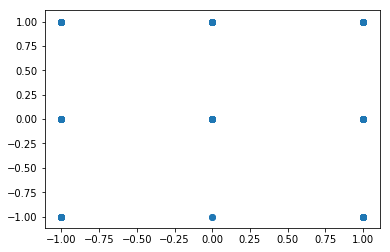

In [161]:
#particions per a fer l'entrenament
particions = [0.5, 0.7, 0.8]

#llegim les dades del fitxer .csv
data = pd.read_csv("csv_result-PhishingData.csv")
data = data.values
#eliminem la primera columna ja que nomes es l'identificador de la mostra i la ultima columna que la col·locarem en la variable ovjetiu
x = data[:,1:-1]

#agafem la ultima columna com a valor objectiu
y = data[:,-1]

ax = plt.scatter(x[:,0], y)

for part in particions:
    # Dividim dades d'entrenament
    x_t, y_t, x_v, y_v = split_data(x, y, part)
    #Passem els outputs a binari amb -1(phisyng) o 1(legitima)
    y_t[y_t == 0] = -1
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=1.5, fit_intercept=True, penalty='l2', tol=0.001)
    # l'entrenem
    logireg.fit(x_t, y_t)
    print("-------------------------")
    print ("Correct classification Logistic ", part, "%: ", logireg.score(x_v, y_v))
    y_pred = logireg.predict(x_v)
    percent_correct_log = np.mean(y_v == y_pred).astype('float32')
    print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")
    print("-------------------------")
    calcularF1score(y_v, y_pred)

In [162]:
#totes les dades
#Creem el regresor logístic
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.000001)
# l'entrenem
logireg.fit(x, y)
print ("Correct classification Logistic ", part, "%: ", logireg.score(x, y))
y_pred = logireg.predict(x)
percent_correct_log = np.mean(y == y_pred).astype('float32')
print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")

Correct classification Logistic  0.8 %:  0.8351810790835181
Correct classification Logistic  0.8 %:  0.83518106 



In [163]:
calcularF1score(y, y_pred)

F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5842206621445901

Avergage micro:
0.8351810790835181

Avergage weighted:
0.8041516111841349

Avergage None:
[0.88231246 0.01869159 0.85165794]


(0.5842206621445901, 0.8351810790835181, 0.8041516111841349)

In [164]:
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#K fold
k_count = 0
f1scores_macro = []
f1scores_micro = []
f1scores_weighted = []
kf = KFold(n_splits=6)
for train_index, test_index in kf.split(x):
    f1score_macro = 0
    f1score_micro = 0
    f1score_weighted = 0
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #transformem les sortides d'entrenament en binaries
    y_train[y_train == 0] = -1
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    
    # l'entrenem
    logireg.fit(X_train, y_train)
    
    print ("Correct classification Logistic ", k_count, ": ", logireg.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(logireg.score(X_test, y_test))
    
    y_pred = logireg.predict(X_test)
    
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)    
    print("-------------------")
    f1score_macro,f1score_micro,f1score_weighted = calcularF1score(y_test, y_pred)
    print("-------------------")    
    k_count += 1
    f1scores_macro.append(f1score_macro)
    f1scores_micro.append(f1score_micro)
    f1scores_weighted.append(f1score_weighted)

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))
f1scores_macro = np.array(f1scores_macro)
f1scores_micro = np.array(f1scores_micro)
f1scores_weighted = np.array(f1scores_weighted)
print("El percent f1 macro és: " + str(np.mean(f1scores_macro)))
print("El percent f1 micro és: " + str(np.mean(f1scores_micro)))
print("El percent f1 weighted és: " + str(np.mean(f1scores_weighted)))

Correct classification Logistic  0 :  0.7876106194690266
Correct classification Logistic  0 :  0.7876106 

-------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5465313759355209

Avergage micro:
0.7876106194690264

Avergage weighted:
0.7519405214972411

Avergage None:
[0.84166667 0.         0.79792746]
-------------------
Correct classification Logistic  1 :  0.8053097345132744
Correct classification Logistic  1 :  0.8053097 

-------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5441063749102382

Avergage micro:
0.8053097345132744

Avergage weighted:
0.7705286364466906

Avergage None:
[0.88054608 0.         0.75177305]
-------------------
Correct classification Logistic  2 :  0.831858407079646
Correct classification Logistic  2 :  0.8318584 

-------------------
F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5629786732649934

Avergage micro:
0.831858407079646

Avergage weig

/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
calcularF1score(y_test, y_pred)

F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
0.5682316869378206

Avergage micro:
0.8133333333333334

Avergage weighted:
0.7735902465960446

Avergage None:
[0.86725664 0.         0.83743842]


/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.5682316869378206, 0.8133333333333334, 0.7735902465960446)

In [166]:
#Utilitzarem leave one out
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#leave one out
loo = LeaveOneOut()
loo.get_n_splits(x)

for train_index, test_index in loo.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament i de validacio
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train[y_train == 0] = -1
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    
    # l'entrenem
    logireg.fit(X_train, y_train)
    
    #print ("Correct classification Logistic ", k_count, ": ", logireg.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(logireg.score(X_test, y_test))
    
    y_pred = logireg.predict(X_test)
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    #print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))

El score mitjà és: 0.8203991130820399
El percent correct mitjà és: 0.8203991


In [167]:
calcularF1score(y_test, y_pred)

F1 scores logistic regressions particions 0.5, 0.7 i 0.8

Avergage macro:
1.0

Avergage micro:
1.0

Avergage weighted:
1.0

Avergage None:
[1.]


(1.0, 1.0, 1.0)

In [168]:
#Utilitzem el model svm
def train_svm(x, y, kernel='linear', C=0.01, gamma=0.001, probability=True):
    if(kernel =='linear'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    if(kernel =='poly'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    if(kernel =='rbf'):
        svclin = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=probability)

    # l'entrenem
    return svclin.fit(x, y)

print("Kernel Linear")
for part in particions:
    # Dividim dades d'entrenament
    x_t, y_t, x_v, y_v = split_data(x, y, part)
    y_t[y_t == 0] = -1
    svm_entrenat = train_svm(x_t, y_t, 'linear')
    print ("Correct classification Logistic ", part, "%: ", svm_entrenat.score(x_v, y_v))
    y_pred = svm_entrenat.predict(x_v)
    percent_correct_log = np.mean(y_v == y_pred).astype('float32')
    print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")
    #calcularF1score(y_t, y_pred)
    
print("Kernel Poly")
for part in particions:
    # Dividim dades d'entrenament
    x_t, y_t, x_v, y_v = split_data(x, y, part)
    y_t[y_t == 0] = -1
    svm_entrenat = train_svm(x_t, y_t, 'poly')
    print ("Correct classification Logistic ", part, "%: ", svm_entrenat.score(x_v, y_v))
    y_pred = svm_entrenat.predict(x_v)
    percent_correct_log = np.mean(y_v == y_pred).astype('float32')
    print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")
    #calcularF1score(y_t, y_pred)
    
print("Kernel Rbf")
for part in particions:
    # Dividim dades d'entrenament
    x_t, y_t, x_v, y_v = split_data(x, y, part)
    y_t[y_t == 0] = -1
    svm_entrenat = train_svm(x_t, y_t, 'rbf')
    print ("Correct classification Logistic ", part, "%: ", svm_entrenat.score(x_v, y_v))
    y_pred = svm_entrenat.predict(x_v)
    percent_correct_log = np.mean(y_v == y_pred).astype('float32')
    print ("Correct classification Logistic ", part, "%: ", percent_correct_log, "\n")
    #calcularF1score(y_t, y_pred)

Kernel Linear
Correct classification Logistic  0.5 %:  0.8035450516986706
Correct classification Logistic  0.5 %:  0.80354506 

Correct classification Logistic  0.7 %:  0.8300492610837439
Correct classification Logistic  0.7 %:  0.8300493 

Correct classification Logistic  0.8 %:  0.8339483394833949
Correct classification Logistic  0.8 %:  0.8339483 

Kernel Poly
Correct classification Logistic  0.5 %:  0.5391432791728212
Correct classification Logistic  0.5 %:  0.53914326 

Correct classification Logistic  0.7 %:  0.5221674876847291
Correct classification Logistic  0.7 %:  0.5221675 

Correct classification Logistic  0.8 %:  0.4944649446494465
Correct classification Logistic  0.8 %:  0.49446493 

Kernel Rbf
Correct classification Logistic  0.5 %:  0.5450516986706057
Correct classification Logistic  0.5 %:  0.5450517 

Correct classification Logistic  0.7 %:  0.5098522167487685
Correct classification Logistic  0.7 %:  0.50985223 

Correct classification Logistic  0.8 %:  0.516605166051

In [169]:
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#K fold
k_count = 0
kf = KFold(n_splits=6)
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train[y_train == 0] = -1
    svm_entrenat = train_svm(X_train, y_train, 'linear')
    
    print ("Correct classification Logistic ", k_count, ": ", logireg.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(svm_entrenat.score(X_test, y_test))
    
    y_pred = svm_entrenat.predict(X_test)
    #calcularF1score(y_train, y_pred)
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)
    k_count += 1

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))

Correct classification Logistic  0 :  0.7876106194690266
Correct classification Logistic  0 :  0.7743363 

Correct classification Logistic  1 :  0.8097345132743363
Correct classification Logistic  1 :  0.8053097 

Correct classification Logistic  2 :  0.8407079646017699
Correct classification Logistic  2 :  0.84070796 

Correct classification Logistic  3 :  0.8222222222222222
Correct classification Logistic  3 :  0.82222223 

Correct classification Logistic  4 :  0.8666666666666667
Correct classification Logistic  4 :  0.8488889 

Correct classification Logistic  5 :  0.8133333333333334
Correct classification Logistic  5 :  0.8088889 

El score mitjà és: 0.8167256637168142
El percent correct mitjà és: 0.8167257


In [170]:
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#K fold
k_count = 0
kf = KFold(n_splits=6)
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train[y_train == 0] = -1
    svm_entrenat = train_svm(X_train, y_train, 'poly')
    
    print ("Correct classification Logistic ", k_count, ": ", svm_entrenat.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(svm_entrenat.score(X_test, y_test))
    
    y_pred = svm_entrenat.predict(X_test)
    #calcularF1score(y_train, y_pred)
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)
    k_count += 1

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))

Correct classification Logistic  0 :  0.4823008849557522
Correct classification Logistic  0 :  0.48230088 

Correct classification Logistic  1 :  0.6106194690265486
Correct classification Logistic  1 :  0.6106195 

Correct classification Logistic  2 :  0.5929203539823009
Correct classification Logistic  2 :  0.59292036 

Correct classification Logistic  3 :  0.4488888888888889
Correct classification Logistic  3 :  0.4488889 

Correct classification Logistic  4 :  0.49777777777777776
Correct classification Logistic  4 :  0.4977778 

Correct classification Logistic  5 :  0.48
Correct classification Logistic  5 :  0.48 

El score mitjà és: 0.5187512291052113
El percent correct mitjà és: 0.5187512


In [171]:
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#K fold
k_count = 0
kf = KFold(n_splits=6)
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train[y_train == 0] = -1
    svm_entrenat = train_svm(X_train, y_train, 'rbf')
    
    print ("Correct classification Logistic ", k_count, ": ", svm_entrenat.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(svm_entrenat.score(X_test, y_test))
    y_pred = svm_entrenat.predict(X_test)
    #calcularF1score(y_train, y_pred)
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)
    k_count += 1

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))

Correct classification Logistic  0 :  0.4823008849557522
Correct classification Logistic  0 :  0.48230088 

Correct classification Logistic  1 :  0.6106194690265486
Correct classification Logistic  1 :  0.6106195 

Correct classification Logistic  2 :  0.5929203539823009
Correct classification Logistic  2 :  0.59292036 

Correct classification Logistic  3 :  0.4488888888888889
Correct classification Logistic  3 :  0.4488889 

Correct classification Logistic  4 :  0.49777777777777776
Correct classification Logistic  4 :  0.4977778 

Correct classification Logistic  5 :  0.48
Correct classification Logistic  5 :  0.48 

El score mitjà és: 0.5187512291052113
El percent correct mitjà és: 0.5187512


In [172]:
#Utilitzarem leave one out
#array on guardarem el score per a fer la mitja
scores = []

#array on guardarem el percent correct per a fer la mitja
percent_corrects = []

#leave one out
loo = LeaveOneOut()
loo.get_n_splits(x)

for train_index, test_index in loo.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Dividim dades d'entrenament i de validacio
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train[y_train == 0] = -1
    svm_entrenat = train_svm(X_train, y_train, 'linear')
    
    #print ("Correct classification Logistic ", k_count, ": ", logireg.score(X_test, y_test))
    #afegim el score per fer la mitja
    scores.append(logireg.score(X_test, y_test))
    y_pred = svm_entrenat.predict(X_test)
    #calcularF1score(y_train, y_pred)
    percent_correct_log = np.mean(y_test == y_pred).astype('float32')
    #print ("Correct classification Logistic ", k_count, ": ", percent_correct_log, "\n")
    #afegim el percentatge per fer mitja
    percent_corrects.append(percent_correct_log)

scores = np.array(scores)
print("El score mitjà és: " + str(np.mean(scores)))
percent_corrects = np.array(percent_corrects)
print("El percent correct mitjà és: " + str(np.mean(percent_corrects)))

El score mitjà és: 0.8233555062823356
El percent correct mitjà és: 0.8211382


In [173]:
#Calculem F1 score:
#print(f1_score(y_v, y_pred, average='macro'))
#print(f1_score(y_v, y_pred, average='micro'))
#print(f1_score(y_v, y_pred, average='weighted'))
#print(f1_score(y_v, y_pred, average=None))


Número de classes: {0, 1, -1}


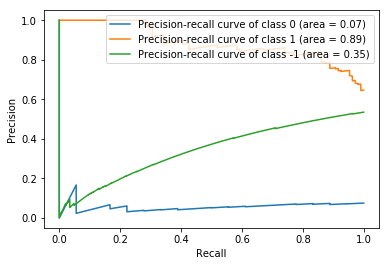

In [174]:
#SVM LINEAR

n_classes = set(y)
print("Número de classes: " + str(n_classes))

x_t, y_t, x_v, y_v = split_data(x, y, 0.8)
y_t[y_t == 0] = -1
# Train model
model = train_svm(x_t, y_t)
# Get class probabilities
probs = model.predict_proba(x_v)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in n_classes:
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])        
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])
    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

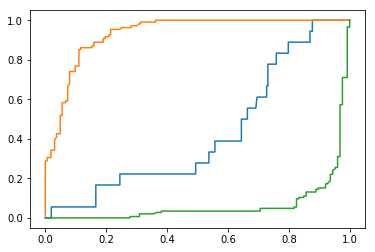

In [175]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in n_classes:
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in n_classes:
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))


Número de classes: {0, 1, -1}


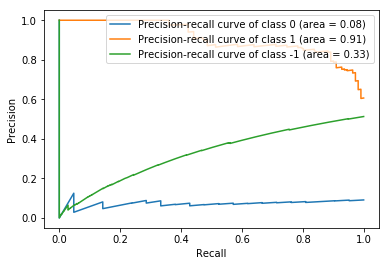

In [176]:
#LOGISTIC REGRESSION PENALTY L2, C=2
n_classes = set(y)
print("Número de classes: " + str(n_classes))

x_t, y_t, x_v, y_v = split_data(x, y, 0.8)
y_t[y_t == 0] = -1
# Train model
#Creem el regresor logístic
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
# l'entrenem
model = logireg.fit(x_t, y_t)
# Get class probabilities
probs = model.predict_proba(x_v)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in n_classes:
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

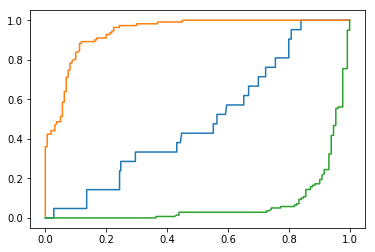

In [177]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in n_classes:
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in n_classes:
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

Número de classes: {0, 1, -1}


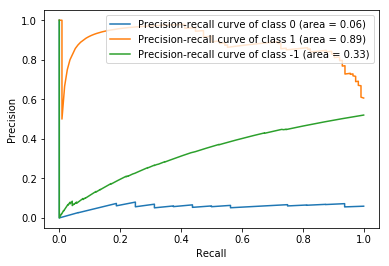

In [178]:
#LOGISTIC REGRESSION PENALTY L1, C= 1

n_classes = set(y)
print("Número de classes: " + str(n_classes))

x_t, y_t, x_v, y_v = split_data(x, y, 0.8)
y_t[y_t == 0] = -1
# Train model
#Creem el regresor logístic
logireg = LogisticRegression(C=1.0, fit_intercept=True, penalty='l1', tol=0.001)
# l'entrenem
model = logireg.fit(x_t, y_t)
# Get class probabilities
probs = model.predict_proba(x_v)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in n_classes:
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

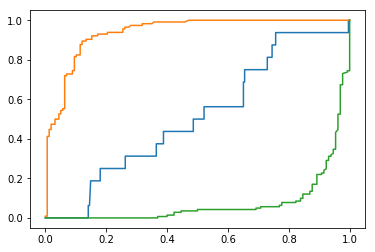

In [179]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in n_classes:
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in n_classes:
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

Número de classes: {0, 1, -1}


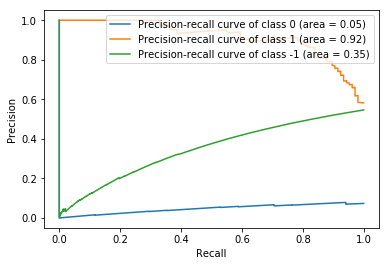

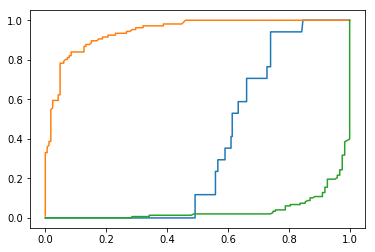

In [180]:
#SVM RBF

n_classes = set(y)
print("Número de classes: " + str(n_classes))

x_t, y_t, x_v, y_v = split_data(x, y, 0.8)
y_t[y_t == 0] = -1
# Train model
model = train_svm(x_t, y_t, 'rbf')
# Get class probabilities
probs = model.predict_proba(x_v)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in n_classes:
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])        
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])
    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in n_classes:
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in n_classes:
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

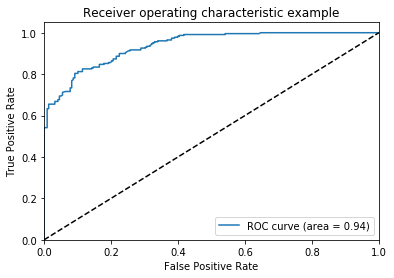

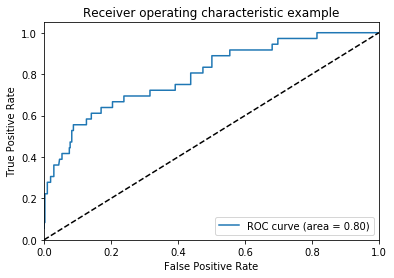

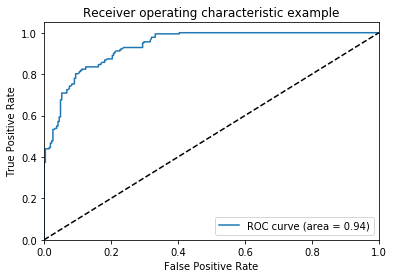

In [181]:
y = label_binarize(y, classes=[-1,0,1])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
y_train[y_train == 0] = -1
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

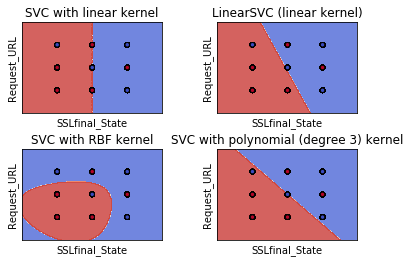

In [182]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#Agafem dos parametres
X = x[:, 2:4]
y = data[:,-1]
y[y == 0] = -1
#x_t, y_t, x_v, y_v = split_data(X, y, part)
#y_t[y_t == 0] = -1
#print(X)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('SSLfinal_State')
    ax.set_ylabel('Request_URL')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

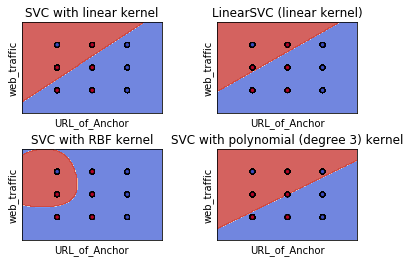

In [183]:
#Agafem dos parametres
X = x[:, 4:6]
#print(X)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('URL_of_Anchor')
    ax.set_ylabel('web_traffic')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

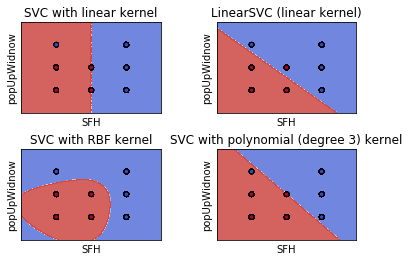

In [184]:
#Agafem dos parametres
X = x[:, :2]
#print(X)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('SFH')
    ax.set_ylabel('popUpWidnow')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

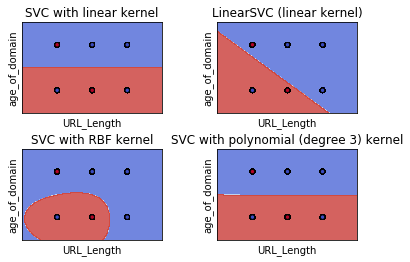

In [185]:
#Agafem dos parametres
X = x[:, 6:8]
#print(X)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('URL_Length')
    ax.set_ylabel('age_of_domain')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()